In [4]:
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Input data file
df = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\Twitter Data Analysis of Trump-Hilary  for Presidential Election 2016\tweets.csv")
df.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 28 columns):
id                         6444 non-null int64
handle                     6444 non-null object
text                       6444 non-null object
is_retweet                 6444 non-null bool
original_author            722 non-null object
time                       6444 non-null object
in_reply_to_screen_name    208 non-null object
in_reply_to_status_id      202 non-null float64
in_reply_to_user_id        208 non-null float64
is_quote_status            6444 non-null bool
lang                       6444 non-null object
retweet_count              6444 non-null int64
favorite_count             6444 non-null int64
longitude                  12 non-null float64
latitude                   12 non-null float64
place_id                   204 non-null object
place_full_name            204 non-null object
place_name                 204 non-null object
place_type                 204 non-null obj

In [7]:
df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,longitude,latitude
count,6.444000e+03,2.020000e+02,2.080000e+02,6444.000000,6444.000000,12.000000,12.000000
mean,7.413582e+17,7.654779e+17,1.282416e+09,4396.176288,11650.680012,-85.292250,39.314359
std,2.697548e+16,1.756255e+16,2.622182e+08,8162.689921,14998.069230,16.055934,3.115716
min,6.842170e+17,7.217700e+17,2.176524e+07,123.000000,274.000000,-118.413638,33.448203
25%,7.226281e+17,7.634849e+17,1.339836e+09,1457.500000,3866.250000,-90.325825,39.295388
50%,7.464104e+17,7.755059e+17,1.339836e+09,2825.000000,7696.500000,-74.697058,40.710403
75%,7.616921e+17,7.767838e+17,1.339836e+09,5403.500000,15118.250000,-73.891241,40.773511
max,7.809256e+17,7.808319e+17,1.536792e+09,490180.000000,660384.000000,-73.880775,41.989661


In [8]:
#Separating out the time variable by Hour, Day, Month and Year 
#for further analysis using datetime package
import datetime as dt
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].apply(lambda x: x.hour)
df['month'] = df['time'].apply(lambda x: x.month)
df['day'] = df['time'].apply(lambda x: x.day)
df['year'] = df['time'].apply(lambda x: x.year)
df.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities,hour,month,day,year
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28 00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...,0,9,28,2016
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27 23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...,23,9,27,2016
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27 23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN,23,9,27,2016
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27 23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...,23,9,27,2016
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27 22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN,22,9,27,2016


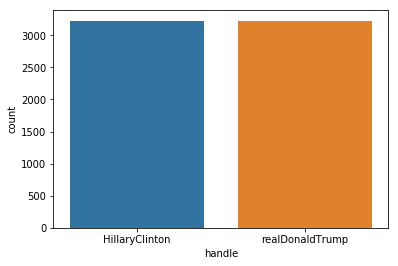

In [9]:
#Total number of tweets by both of the twitter handles
sns.countplot(x='handle', data = df)

[[Text(0, 0, 'Tweets'), Text(0, 0, 'Retweets')]]

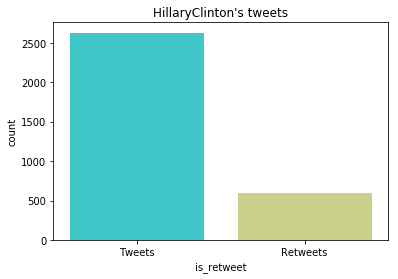

In [10]:
#Total number of original tweets and retweets for each of the contender
retweet_hc = df.loc[(df['handle']=='HillaryClinton'), ['is_retweet']]
retweet_dt = df.loc[(df['handle']=='realDonaldTrump'), ['is_retweet']]
ax1 = sns.countplot(retweet_hc['is_retweet'], palette='rainbow')
ax1.set_title("HillaryClinton's tweets")
ax1.set(xticklabels=["Tweets","Retweets"])


[[Text(0, 0, 'Tweets'), Text(0, 0, 'Retweets')]]

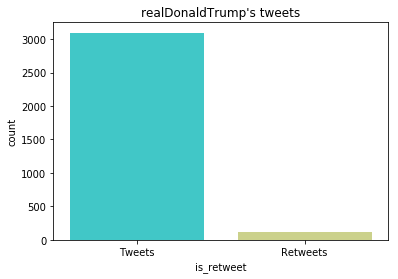

In [11]:
ax2 = sns.countplot(retweet_dt['is_retweet'], palette='rainbow')
ax2.set_title("realDonaldTrump's tweets")
ax2.set(xticklabels=["Tweets","Retweets"])

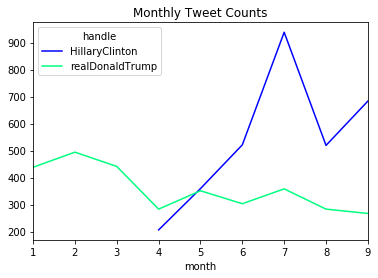

In [12]:
#Number of tweets by the months
monthly_tweets = df.groupby(['month', 'handle']).size().unstack()
monthly_tweets.plot(title='Monthly Tweet Counts', colormap='winter')

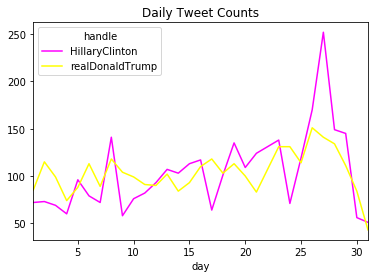

In [13]:
#Number of tweets daily
daily_tweets = df.groupby(['day', 'handle']).size().unstack()
daily_tweets.plot(title='Daily Tweet Counts', colormap='spring')

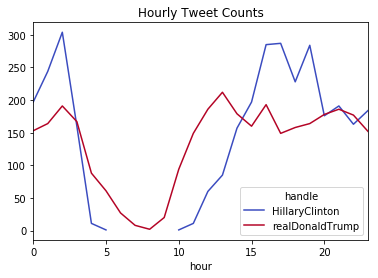

In [14]:
#Number of tweets hourly
hourly_tweets = df.groupby(['hour', 'handle']).size().unstack()
hourly_tweets.plot(title='Hourly Tweet Counts', colormap='coolwarm')